In [124]:
import numpy as np
import pandas as pd #for loading csv Excel files
import itertools #to merge lists
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit #for fitting
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams
from scipy.special import kn #Modified Bessel function of the second kind of integer order n
import scipy.integrate as integrate #for (numerical) integrating
from scipy import optimize as opt #for numerical root finding

# Options for plotting

In [2]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [3]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

In [4]:
goldenratio=1.61803398875 #Standard Python ratio for plot width/height=8/6.

# Constants

In [5]:
hbar=1.
c=2.99792458*10.**8.*10.**(-3.) #km/s (not m/s)
GeV_to_cmminus1=5.068*10.**13.
GeV_to_g=1.78*10.**(-24.)
fm_to_cm=10.**(-15.)*10.**2.

# delta_l

## Approximate analytical solution for delta_l

In [6]:
def deltalappr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    #_____Variables_____
    #m=(mX/2.)  #reduced mass m
    #k=m*(v/c) #momentum k
    #r0=l/k
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____deltalappr_____
    #deltalappr=(-1.)*prefactor*alphaX*(m/hbar**2)*(kn(0.,mphi*r0)/k)
    deltalappr=(-1.)*prefactor*(1./(2.*a*hbar**2.))*kn(0.,l/(a*b))
    return deltalappr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))

-411.64339210020086


## Numerical solution for delta_l

In [7]:
#_____Yukawa potential_____
def U(potential,alphaX,mphi,r):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    U=prefactor*(alphaX/r)*np.exp(-mphi*r)
    return U

In [8]:
def deltal(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    k=m*(v/c) #momentum k
    E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k ###Doesn't work well. Numerically very unstable.
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/(E*c**2)
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    r0=l/k
    #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    logging=False
    if logging:
        print([r0,rmax,rmax/r0])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    deltalintegral=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    deltal=k*c**2*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1.
v=10. #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltal(potential,alphaX,mX,mphi,l,v))

-411.64339210020086
-411.6428220507938


In [9]:
#vvals=np.logspace(np.log10(1.),np.log10(10.**4.),100)
vvals=np.logspace(np.log10(10.),np.log10(10.**4.),100)

l=1

[v,deltaappr,delta]:
[10.0, -411.64339210020086, -411.6428220507938]
[10.722672220103231, -401.8682712231668, -401.86766163704556]
[11.497569953977356, -391.68367962643094, -391.68470042856717]
[12.32846739442066, -381.16748156285183, -381.1667585734447]
[13.219411484660288, -370.39205597480753, -370.3921999966576]
[14.174741629268055, -359.42425877607076, -359.4249880510128]
[15.199110829529339, -348.3254649422658, -348.3258319922835]
[16.297508346206442, -337.15167553574, -337.1510563769013]
[17.47528400007684, -325.9536764220156, -325.95334994241875]
[18.73817422860384, -314.7772370349801, -314.77716558595137]
[20.09233002565047, -303.6633390768678, -303.6645456386431]
[21.544346900318846, -292.64842647004787, -292.64765382053645]
[23.101297000831604, -281.7646691942453, -281.76480118460404]
[24.770763559917114, -271.04023483664145, -271.0408248719867]
[26.560877829466868, -260.4995627510545, -260.4997436785138]
[28.48035868435802, -250.16363666820536, -250.162922197371]
[30.53

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.


[3274.5491628777286, -4.403191938803155, -4.027434747282733]
[3511.191734215131, -4.165994615605128, -3.7904431588679492]
[3764.9358067924672, -3.9407706268525486, -3.566130719758811]
[4037.017258596554, -3.7269832259486875, -3.353827014347304]
[4328.761281083057, -3.5241136727648765, -3.1526314928690633]
[4641.588833612782, -3.3316612369695573, -2.9619831253477393]
[4977.023564332114, -3.1491431204430222, -2.7818131907122927]
[5336.699231206313, -2.9760943094394285, -2.612351962844008]
[5722.3676593502205, -2.812067366127805, -2.450904666189498]
[6135.907273413176, -2.656632168197291, -2.2993287587336027]
[6579.332246575683, -2.509375604343822, -2.1568620974599453]
[7054.8023107186455, -2.369901232660166, -2.021534900303862]
[7564.633275546291, -2.23782890822383, -1.895625410652278]
[8111.308307896872, -2.1127943855128692, -1.7757513747258689]
[8697.490026177835, -1.9944489006734378, -1.6645539915528689]
[9326.0334688322, -1.8824587381106876, -1.5578255531030654]
[10000.0, -1.77650478

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Plots/deltal.pdf exported.


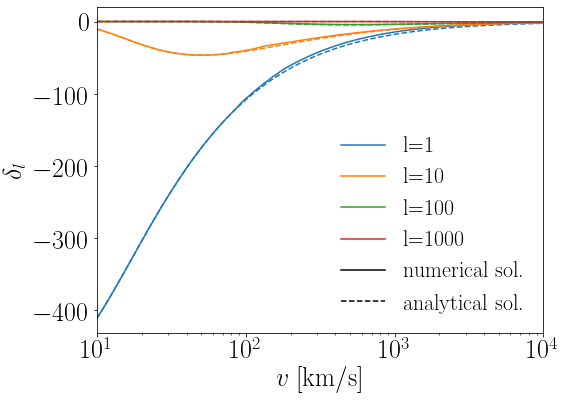

In [10]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,10,100,1000]
#lvals=[1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    print('l='+str(l))
    color='C'+str(i)
    deltalvals=np.array([deltal(potential,alphaX,mX,mphi,l,v) for v in vvals])
    print()
    deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals])
    logging=True
    if logging==True:
        print('[v,deltaappr,delta]:')
        for i in range(0,len(vvals)):
            print([vvals[i],deltalapprvals[i],deltalvals[i]])
    pl.plot(vvals,deltalvals,linestyle='-',label='l='+str(l),color=color) 
    pl.plot(vvals,deltalapprvals,linestyle='--')
    if l==lvals[-1]:
        pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
        pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


pl.xlim([vvals[0],vvals[-1]])
#pl.ylim([-0.25,0.01])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize)
pl.savefig('Plots/deltal.pdf',bbox_inches='tight')
print('Plots/deltal.pdf exported.')
pl.show()

In [11]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# #lvals=[1,5,10,50,100,1000]
# lvals=[1,10,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     #print('l='+str(l))
#     color='C'+str(i)
#     pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label='l='+str(l),color=color) 
#     pl.plot(vvals,[deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='--')
#     if l==lvals[-1]:
#         pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
#         pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


# pl.xlim([10.**2.,vvals[-1]])
# pl.ylim([-0.005,0.01])
# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
# pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize)    
# pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Plots/difference_deltal.pdf exported.


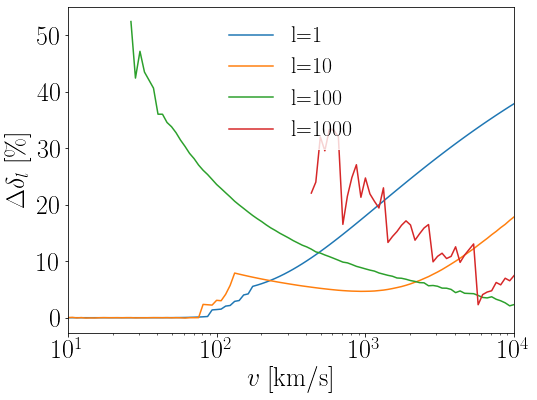

In [12]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
#lvals=[1,5,10,50,100,1000]
lvals=[1,10,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    color='C'+str(i)
    vdelta_deltalvals=[]
    for j in range(0,len(vvals)):
        v=vvals[j]
        deltaapprval=deltalappr(potential,alphaX,mX,mphi,l,v)
        deltaval=deltal(potential,alphaX,mX,mphi,l,v)
        if not deltaval==0:
            delta_deltal=(deltaapprval-deltaval)/deltaapprval
            vdelta_deltalvals.append([v,delta_deltal])
    vdelta_deltalvals=np.array(vdelta_deltalvals)
    #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
    #pl.plot(vvals,[100.*((deltalappr(potential,alphaX,mX,mphi,l,v)-deltal(potential,alphaX,mX,mphi,l,v))/deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label='l='+str(l),color=color)
    #pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label=str(l),color=color)
    pl.plot(vdelta_deltalvals[:,0],100.*vdelta_deltalvals[:,1],linestyle='-',label='l='+str(l),color=color)


pl.xlim([vvals[0],vvals[-1]])
#pl.ylim([40.,90.])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\Delta \delta_l\; [\%]$',fontsize=fontsize) 
pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/difference_deltal.pdf',bbox_inches='tight')
print('Plots/difference_deltal.pdf exported.')
pl.show()

## Comparison to Sean's data for delta_l

In [13]:
#_____[linenumber l, delta(l)]_____
#Values for deltal in Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
deltaldata=np.loadtxt(r'C:\Users\Laura Sagunski\Laura Dropbox (1)\Laura Sagunski\Self-interaction cross section\DataDarkPhotonModel\deltaL_v1000.dat') #Need r'' to produce a raw string (alternatively replace all ...\... by ...\\...).
print(deltaldata)

[ 1.12523197 -0.12437827 -1.11121981 ...  0.01928939  0.01922529
  0.01916167]


In [14]:
lvals=np.array([float(l) for l in range(0,len(deltaldata))])
print(lvals)

[0.000e+00 1.000e+00 2.000e+00 ... 1.498e+03 1.499e+03 1.500e+03]


In [15]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for l in lvals])
print(deltalapprvals)

[        -inf -17.76504785 -15.68716616 ...  -0.01938057  -0.01931641
  -0.01925246]


## delta_l

In [16]:
dldeltalDeltadeltal=[]
for l in range(1,len(lvals)): #For l=0: deltaappr=-np.inf.
    deltal=deltalappr(potential,alphaX,mX,mphi,l,v)
    n=int(abs(deltal)/(np.pi/2))
    deltalapprnew=abs(deltal)-n*(np.pi/2)
    epsilon=1. #np.pi/2. Due to numerical uncertainties the difference can be slightly smaller than np.pi/2 so that no sign change occurs.
    if deltalapprnew-deltaldata[l]>epsilon:
        deltalapprnew=deltalapprnew-np.pi/2
    output=[float(l),deltalapprnew,deltaldata[l],abs((deltaldata[l]-deltalapprnew)/deltaldata[l])]
    print(output)
    dldeltalDeltadeltal.append(output)
dldeltalDeltadeltal=np.array(dldeltalDeltadeltal)
print(dldeltalDeltadeltal)

[1.0, 0.4862882589777513, -0.12437827449718497, 4.909752414106351]
[2.0, -0.020797104262484822, -1.1112198142097587, 0.98128443715947]
[3.0, 0.33463074385451996, 1.2406234163140808, 0.7302721039647025]
[4.0, 1.0432216751084713, 0.5930058013661873, 0.759209897618305]
[5.0, 0.37455239327464795, 0.048877398565205954, 6.663100006743775]
[6.0, -0.17168416295858613, -0.41805274308123236, 0.5893241563416175]
[7.0, -0.63341755770238, -0.8258294812866838, 0.2329923161431781]
[8.0, -1.0332889699634524, -1.1871334676824528, 0.12959326133677188]
[9.0, -1.385902882617522, -1.5111083251233237, 0.08285669559499223]
[10.0, 1.4403611622922625, 1.3370734922078364, 0.0772490597460524]
[11.0, 1.1552048098960075, 1.0691087201336398, 0.08053071510969025]
[12.0, 0.8949684676643983, 0.8226267991755452, 0.0879398392580397]
[13.0, 0.6556633260562137, 0.5945141067738533, 0.10285579195788686]
[14.0, 0.4341886543703293, 0.38227646402506493, 0.1357975058120779]
[15.0, 0.2280862544194786, 0.18389025309362536, 0.2403

Plots/Plots/deltal_analytical_vs_numerical.pdf exported.


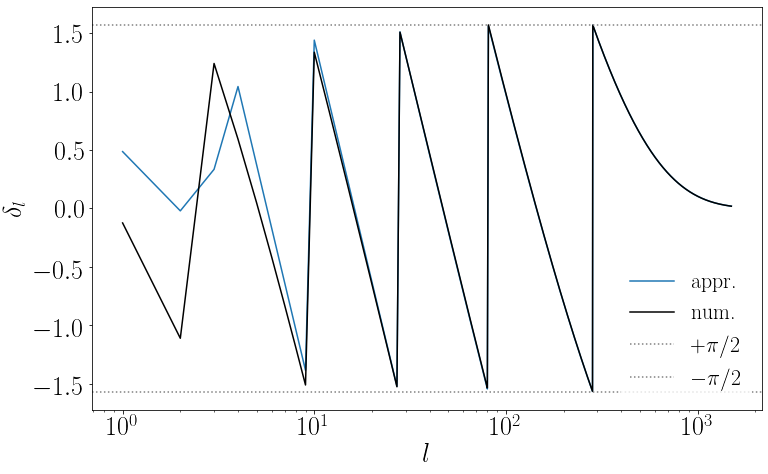

In [94]:
pl.figure(figsize=(12,12/goldenratio)) 
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,1],'-',label=r'appr.')
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,2],'-',color='black',label=r'num.')
pl.xscale('log')
pl.axhline(np.pi/2.,color='gray',linestyle=':',label=r'$+\pi/2$')
pl.axhline(-np.pi/2.,color='gray',linestyle=':',label=r'$-\pi/2$')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/deltal_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/deltal_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_deltal_analytical_vs_numerical.pdf exported.


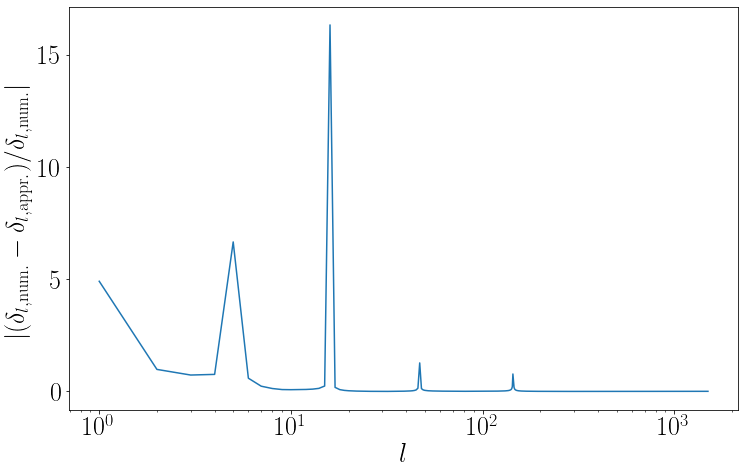

In [95]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,3],'-')
pl.xscale('log')
#pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\left|(\delta_{l,\rm num.}-\delta_{l,\rm appr.})/\delta_{l,\rm num.}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_deltal_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_deltal_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf exported.


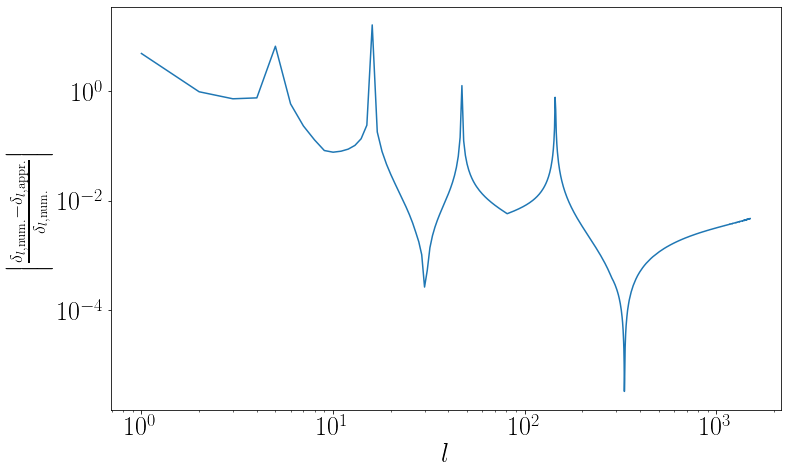

In [96]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot(dldeltalDeltadeltal[:,0],dldeltalDeltadeltal[:,3],'-')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\delta_{l,\rm num.}-\delta_{l,\rm appr.}}{\delta_{l,\rm num.}}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_deltal_analytical_vs_numerical_logscale.pdf exported.')
pl.show()

# delta_l+1-delta_l

## Approximate analytical solution for delta_l+1-delta_l~d delta_l/d l

In [22]:
def ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    #_____ddeltal_dl_appr_____
    ddeltal_dl_appr=(-1.)*prefactor*(1./(2.*a**2.*b*hbar**2.))*kn(1.,l/(a*b))
    return ddeltal_dl_appr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v))

-274.8746242028307


In [23]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
ddeltal_dl_apprvals=np.array([ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v) for l in range(1,len(lvals)-1)])
print(ddeltal_dl_apprvals)

[-2.99783801e+00 -1.49880783e+00 -9.99092889e-01 ... -6.44883614e-05
 -6.42708970e-05 -6.40541838e-05]


### Comparison d delta_l/d l with delta_l+1-delta_l

In [24]:
ddeltal_dl_vals=[]
for l in range(1,len(lvals)-1): 
    ddeltal_dl=deltaldata[l+1]-deltaldata[l] 
    epsilon=1. 
    if ddeltal_dl>1.:
        ddeltal_dl=ddeltal_dl-np.pi #2*np.pi/2.
        #print(ddeltal_dl)
    ddeltal_dl_vals.append(ddeltal_dl)
ddeltal_dl_vals=np.array(ddeltal_dl_vals)
print(ddeltal_dl_vals)

[-9.86841540e-01 -7.89749423e-01 -6.47617615e-01 ... -6.40027444e-05
 -6.41044972e-05 -6.36180280e-05]


In [130]:
print(ddeltal_dl_apprvals)

[-2.99783801e+00 -1.49880783e+00 -9.99092889e-01 ... -6.44883614e-05
 -6.42708970e-05 -6.40541838e-05]


In [131]:
print(ddeltal_dl_vals)

[-9.86841540e-01 -7.89749423e-01 -6.47617615e-01 ... -6.40027444e-05
 -6.41044972e-05 -6.36180280e-05]


Plots/Plots/ddeltal_dl_analytical_vs_numerical.pdf exported.


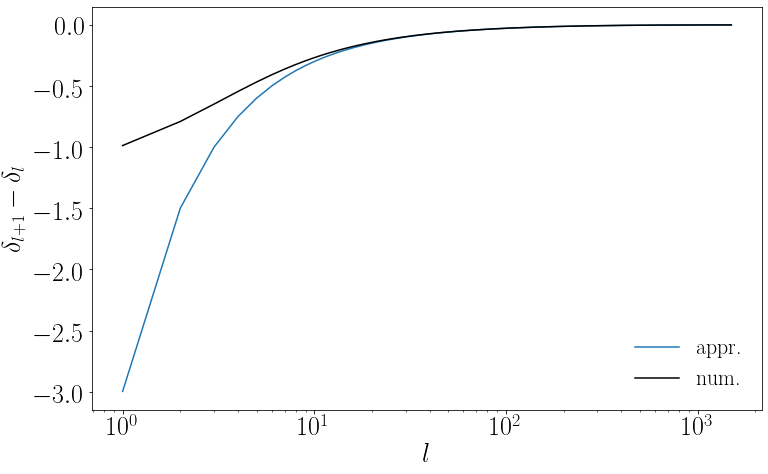

In [93]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot([l for l in range(1,len(lvals)-1)],ddeltal_dl_apprvals,'-',label='appr.')
pl.plot([l for l in range(1,len(lvals)-1)],ddeltal_dl_vals,'-',color='black',label='num.')

pl.xscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
pl.ylabel(r'$\delta_{l+1}-\delta_{l}$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/ddeltal_dl_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/ddeltal_dl_analytical_vs_numerical.pdf exported.')
pl.show()

No handles with labels found to put in legend.


Plots/Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf exported.


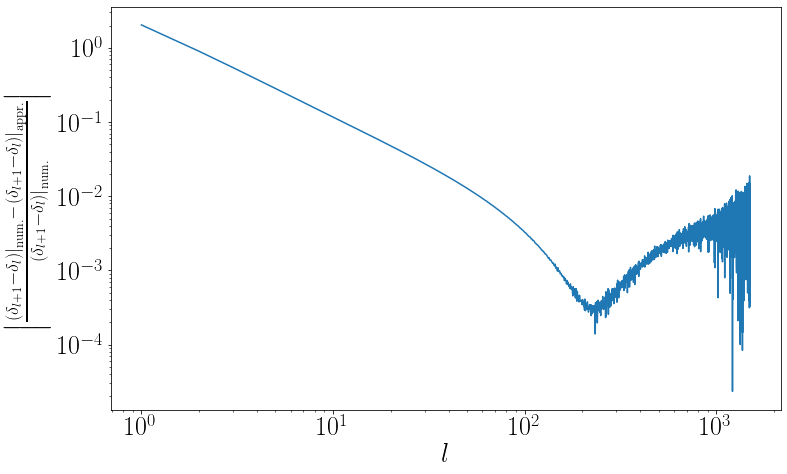

In [92]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
pl.plot([l for l in range(1,len(lvals)-1)],abs((ddeltal_dl_vals-ddeltal_dl_apprvals)/ddeltal_dl_vals),'-')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$l$',fontsize=fontsize) 
#pl.ylabel(r'$\Delta (\delta_{l+1}-\delta_{l})$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\left.(\delta_{l+1}-\delta_{l})\right|_{\rm num.}-\left.(\delta_{l+1}-\delta_{l})\right|_{\rm appr.}}{\left.(\delta_{l+1}-\delta_{l})\right|_{\rm num.}}\right|$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Plots/Difference_ddeltal_dl_analytical_vs_numerical.pdf exported.')
pl.show()

# Transfer cross section sigmaT

## Approximate analytical solution

In [45]:
#def sigmaT_appr(potential,alphaX,mX,mphi,v):
def sigmaT_appr(alphaX,mX,mphi,v):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    k=a*b*mphi
    #_____sigmaT_appr_____
    x=1/(a*b)
    #sigmaT_appr=((8.*np.pi)/(mphi*GeV_to_cmminus1)**2.)*a**2.*beta**4.*(1./hbar**4.)*(kn(0.,x)*kn(2.,x)-kn(1.,x)**2.)
    #print(sigmaT_appr)
    sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(8*a**3.*b))*(1./hbar**4.)*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    #print(sigmaT_appr) ###Same result as before.
    return sigmaT_appr

def sigmaTm_appr(alphaX,mX,mphi,v):
    return sigmaT_appr(alphaX,mX,mphi,v)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
print(sigmaT_appr(alphaX,mX,mphi,v))
print(sigmaTm_appr(alphaX,mX,mphi,v))

2.1442877197733686e-24
0.006023280111722946


In [187]:
#def sigmaT_appr(potential,alphaX,mX,mphi,v):
def sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax):
    ### No difference between attractive and repulsive case for cross section.
    #if potential=='attractive':
    #    prefactor=+1.
    #elif potential=='repulsive':
    #    prefactor=-1.
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    k=a*b*mphi
    #_____sigmaT_appr_____
    xmin=lmin/(a*b)
    xmax=lmax/(a*b)
    def term(x):
        return x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x)
    #sigmaT_appr=((8.*np.pi)/(mphi*GeV_to_cmminus1)**2.)*a**2.*beta**4.*(1./hbar**4.)*(kn(0.,x)*kn(2.,x)-kn(1.,x)**2.)
    #print(sigmaT_appr)
    def term(x):
        return (x/2.)*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    #sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(4.*a**2.))*(1./hbar**4.)*(x/2.)*(x*kn(0.,x)**2.-x*kn(1.,x)**2.+2.*kn(0.,x)*kn(1.,x))
    sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(4.*a**2.))*(1./hbar**4.)*(term(xmin)-term(xmax))
    #sigmaT_appr=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)*(1./(8*a**3.*b))*(1./hbar**4.)*(term(xmin)-term(xmax))
    #print(sigmaT_appr) ###Same result as before.
    return sigmaT_appr

def sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax):
    return sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
lmin=1.
lmax=1500
print(sigmaT_apprnew(alphaX,mX,mphi,v,lmin,lmax))
print(sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax))

2.144243459703709e-24
0.006023155785684576


## Numerical solution for sigmaT

In [28]:
def sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v):
    if potential=='repulsive':
        return 'sigmaT cannot be computed. No data for deltal available.'
    elif potential=='attractive':
        #_____Variables_____
        a=(v/c)/(2*alphaX)
        b=alphaX*(mX/mphi)
        beta=1./(2.*a**2.*b)
        #m=(mX/2.)  #reduced mass m
        #k=m*(v/c) #momentum k
        #print([k,a*b*mphi])
        k=a*b*mphi
        #_____Sum_____
        if lmax==len(lvals):
            lmax=lmax-1
        Sum=np.sum([(l+1.)*np.sin(deltaldata[l+1]-deltaldata[l])**2. for l in range(lmin,lmax)])
        #_____sigmaT_____
        prefactor=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)
        sigmaT=prefactor*Sum
        return sigmaT
    
def sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v):
    return sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v)/(mX*GeV_to_g) #cm**2/g
    
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
lmin=0
lmax=len(lvals)
print(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v))
print(sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v))

1.733662460019863e-24
0.004869838370842313


In [29]:
# def sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v):
#     if potential=='repulsive':
#         return 'sigmaT cannot be computed. No data for deltal available.'
#     elif potential=='attractive':
#         #_____Variables_____
#         a=(v/c)/(2*alphaX)
#         b=alphaX*(mX/mphi)
#         beta=1./(2.*a**2.*b)
#         #m=(mX/2.)  #reduced mass m
#         #k=m*(v/c) #momentum k
#         #print([k,a*b*mphi])
#         k=a*b*mphi
#         #_____Sum_____
#         if lmax==len(lvals):
#             lmax=lmax-1
#         Sum=np.sum([(2.*l+1.)*np.sin(deltaldata[l])**2.-(2.*l+1.)*np.sin(deltaldata[l])*np.sin(deltaldata[l+1])*np.cos(deltaldata[l+1]-deltaldata[l]) for l in range(lmin,lmax)])
#         #_____sigmaT_____
#         prefactor=((4.*np.pi)/(k*GeV_to_cmminus1)**2.)
#         sigmaT=prefactor*Sum
#         return sigmaT
    
# def sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v):
#     return sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v)/(mX*GeV_to_g) #cm**2/g
    
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# v=1000 #km/s
# lmin=0
# lmax=len(lvals)
# #print(sigmaT(potential,alphaX,mX,mphi,lmin,lmax,v))
# print(sigmaTBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v))
# #print(sigmaTm(potential,alphaX,mX,mphi,lmin,lmax,v))
# print(sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,lmax,v))

1.7180371344129937e-23
0.0


## Phenomenological fit function for sigmaT in terms of beta

In [43]:
#_____Classical regime ((v/c)(mX/mphi)>>1 <=> 2ab>>1)_____
#For sigmaTclass see eqns.(7)+(A3) in Sean's paper "Beyond Colisionless DM...", 1302.3898

def sigmaTbeta(potential,alphaX,mX,mphi,v):
    #_____Variables_____
    a=(v/c)/(2*alphaX)
    b=alphaX*(mX/mphi)
    beta=1./(2.*a**2.*b)
    #m=(mX/2.)  #reduced mass m
    #k=m*(v/c) #momentum k
    #print([k,a*b*mphi])
    k=a*b*mphi
    #_____sigmaT_____
    if potential=='repulsive':
        if beta<=1.:
            term=(1./2.)*beta**2.*np.log(1.+(1./beta**2.))
        elif beta>1.:
            term=(1./4.)*(np.log(2.*beta)-np.log(np.log(2.*beta)))**2.
    elif potential=='attractive':
        if beta<=10.**(-1.): 
            term=beta**2.*np.log(1.+(1./beta))
        elif 10.**(-1.)<beta<10.**3.:
            term=2.*(beta**2./(1.+1.5*beta**1.65))
        elif beta>=10.**3.:
            term=(1./4.)*(np.log(beta)+1.-1./(2.*np.log(beta)))**2.
    prefactor=(4.*np.pi)/(mphi*GeV_to_cmminus1)**2.
    sigmaTbeta=prefactor*term
    return sigmaTbeta

def sigmaTmbeta(potential,alphaX,mX,mphi,v):
    return sigmaTbeta(potential,alphaX,mX,mphi,v)/(mX*GeV_to_g) #cm**2/g

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000 #km/s
print(sigmaTbeta(potential,alphaX,mX,mphi,v))
print(sigmaTmbeta(potential,alphaX,mX,mphi,v))

1.865695598079722e-24
0.005240717972134052


In [116]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=0
lmin=1
sigmaTmvals=np.array([[l,sigmaTm(potential,alphaX,mX,mphi,lmin,l,v)] for l in range(lmin,len(lvals))])
print(len(sigmaTmvals))
#sigmaTmBuckleyFoxvals=np.array([sigmaTmBuckleyFox(potential,alphaX,mX,mphi,lmin,l,v) for l in range(0,len(lvals))])
#print(sigmaTmBuckleyFoxvals)
print(sigmaTm_appr(alphaX,mX,mphi,v))

1500
0.006023280111722946


In [ ]:
ri=opt.brentq(f,R,rmax,maxiter=150)

In [160]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
print(ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v)**2.-1.)
def root(l):
    return ddeltal_dl_appr(potential,alphaX,mX,mphi,l,v)**2.-1.
print(opt.brentq(root,1.,1500.))

7.987032745932128
1.246424909785123
2.9972797267555267


In [188]:
#Parameters from Fig.2 in Sean's paper 1302.3898. mX=200 GeV, mphi=1 MeV=10**(-3) GeV, alphaX=10**(-2), v=1000 km/s.
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
v=1000. #km/s
#lmin=1
a=(v/c)/(2*alphaX)
b=alphaX*(mX/mphi)
lmin=1./(2*a)
#lmin=2.9972797267555267
print(lmin)
sigmaTmapprnewvals=np.array([[lmax,sigmaTm_apprnew(alphaX,mX,mphi,v,lmin,lmax)] for lmax in range(int(lmin),len(lvals))])
print(sigmaTmapprnewvals)

2.99792458
[[ 2.00000000e+00 -4.49209278e-04]
 [ 3.00000000e+00  7.67922569e-07]
 [ 4.00000000e+00  3.19948704e-04]
 ...
 [ 1.49800000e+03  4.80455907e-03]
 [ 1.49900000e+03  4.80455984e-03]
 [ 1.50000000e+03  4.80456059e-03]]


[0.006023280111722946, 0.005240717972134052]
Plots/sigmaT_analytical_vs_numerical.pdf exported.


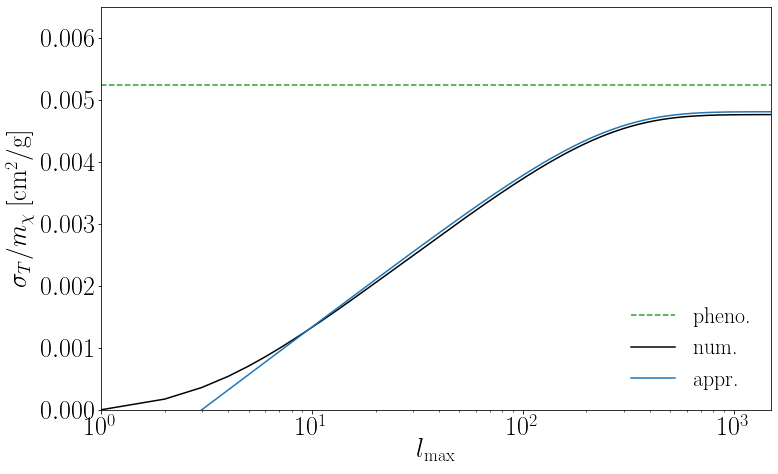

In [189]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),linestyle='-',label='appr.',color='C0')
pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),linestyle='--',label='pheno.',color='C2')
pl.plot(sigmaTmvals[:,0],sigmaTmvals[:,1],'-',label='num.',color='black')
pl.plot(sigmaTmapprnewvals[:,0],sigmaTmapprnewvals[:,1],'-',label='appr.',color='C0')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.xlim([1,1500])
#pl.ylim([-0.035,0.015])
pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

[0.006023280111722946, 0.005240717972134052]
Plots/sigmaT_analytical_vs_numerical.pdf exported.


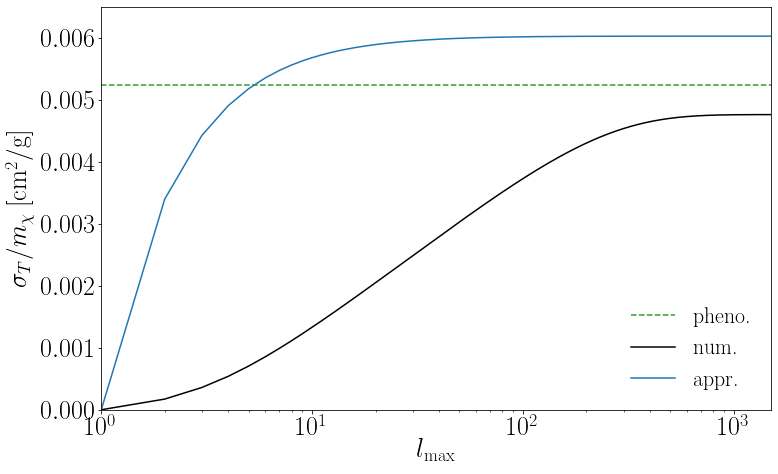

In [117]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),linestyle='-',label='appr.',color='C0')
pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),linestyle='--',label='pheno.',color='C2')
pl.plot(sigmaTmvals[:,0],sigmaTmvals[:,1],'-',label='num.',color='black')
pl.plot(sigmaTmapprnewvals[:,0],sigmaTmapprnewvals[:,1],'-',label='appr.',color='C0')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.xlim([1,1500])
#pl.ylim([-0.035,0.015])
pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

In [190]:
pl.figure(figsize=(12,12/goldenratio)) #Sophia's plot size.
#print([sigmaTm_appr(alphaX,mX,mphi,v),sigmaTmbeta(potential,alphaX,mX,mphi,v)])
#pl.axhline(sigmaTm_appr(alphaX,mX,mphi,v),label='appr.',color='C0')
#pl.axhline(sigmaTmbeta(potential,alphaX,mX,mphi,v),label='pheno.',color='C3')
pl.plot(sigmaTmvals[:,0],abs((sigmaTmvals[:,1]-sigmaTmapprnewvals[:,1])/sigmaTmvals[:,1]),'-',label='appr.',color='C0')
pl.plot(sigmaTmvals[:,0],abs((sigmaTmvals[:,1]-sigmaTmbeta(potential,alphaX,mX,mphi,v))/sigmaTmvals[:,1]),'--',label='pheno.',color='C2')
#pl.plot(lvals,sigmaTmBuckleyFoxvals,'o-') 

pl.xscale('log')
pl.yscale('log')
pl.xlim([0,1500])
#pl.ylim([-0.035,0.015])
#pl.ylim([0.,0.0065])
pl.xlabel(r'$l_{\rm max}$',fontsize=fontsize) 
pl.ylabel(r'$\sigma_{T}/m_{\chi} \;[\rm cm^2/g]$',fontsize=fontsize) 
pl.ylabel(r'$\left|\frac{\left.\sigma_{T}/m_{\chi}\right|_{\rm num.}-\sigma_{T}/m_{\chi}}{\left.\sigma_{T}/m_{\chi}\right|_{\rm num.}}\right|$',fontsize=fontsize) 

pl.legend(loc='upper right',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/Difference_sigmaT_analytical_vs_numerical.pdf',bbox_inches='tight')
print('Plots/Difference_sigmaT_analytical_vs_numerical.pdf exported.')
pl.show()

ValueError: operands could not be broadcast together with shapes (1500,) (1499,) 

<Figure size 864x533.981 with 0 Axes>